## Clustering Project using K-Means

### Clustering Iris Dataset with K-Means

## Description

 This project demonstrates how to perform clustering using the K-Means algorithm on the famous Iris dataset. The Iris dataset is a well-known dataset in the machine learning community and is often used to demonstrate various algorithms. In this project, we will explore the data, apply the K-Means clustering algorithm, and visualize the results.

In [1]:
# Setting Environment Variables
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris 
from sklearn.cluster import KMeans
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, confusion_matrix, accuracy_score
import joblib  # For saving the model
#from threadpoolctl import threadpool_limits

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

### Loading the dataset

In [3]:
# Loading the dataset
iris = sns.load_dataset('iris') 
iris.head() 


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploratory Data Analysis (EDA)

In [4]:
# Exploratory Data Analysis (EDA)
print(iris.info())
print(iris.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

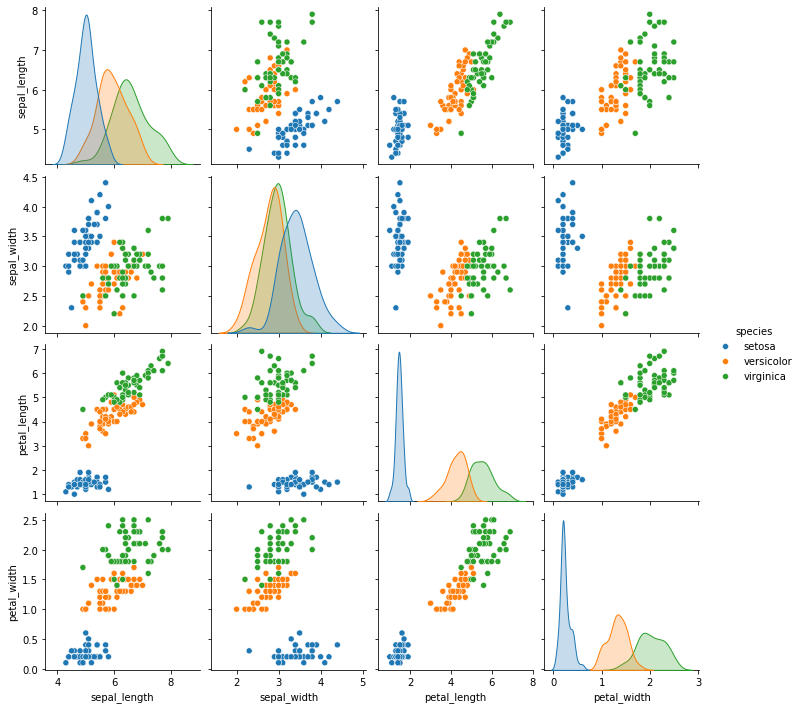

In [5]:
# Pairplot to visualize the relationships between features
sns.pairplot(iris, hue='species')
plt.show()

## Data Preparation

In [6]:
X = iris.iloc[:, :-1] 
y = iris.species 

## Elbow Method to Determine Optimal Clusters

The Within-Cluster Sum of Squares (WCSS) is calculated for different numbers of clusters to determine the optimal number using the elbow method.


WCSS is a measure of the total variance within each cluster. It quantifies how compact the clusters are. The goal is to minimize WCSS by choosing the appropriate number of clusters.

In [7]:
wcss = [] 
  
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++', 
                    max_iter=300, 
                    n_init=10, 
                    random_state=42) 
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_) 

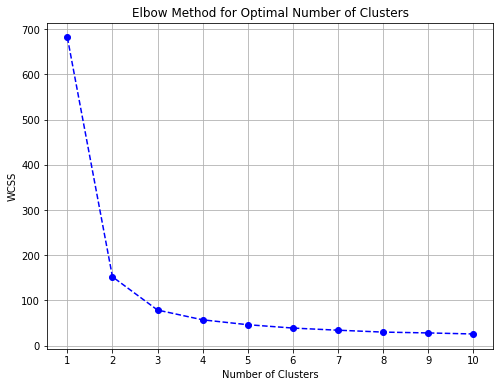

In [8]:
# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


## Applying K-Means with Optimal Clusters

The choice of 3 clusters for the Iris dataset is justified given the dataset’s structure and known number of classes.

In [9]:
kmeans = KMeans(n_clusters=3, 
                init='k-means++', 
                max_iter=300, 
                n_init=10, 
                random_state=42) 
y_kmeans = kmeans.fit_predict(X) 


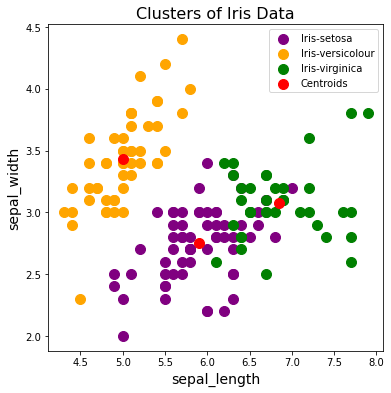

In [10]:
# Visualising the clusters 
plt.figure(figsize=(6, 6))
cols = iris.columns 
plt.scatter(X.loc[y_kmeans == 0, cols[0]], 
            X.loc[y_kmeans == 0, cols[1]], 
            s=100, c='purple', 
            label='Iris-setosa') 
plt.scatter(X.loc[y_kmeans == 1, cols[0]], 
            X.loc[y_kmeans == 1, cols[1]], 
            s=100, c='orange', 
            label='Iris-versicolour') 
plt.scatter(X.loc[y_kmeans == 2, cols[0]], 
            X.loc[y_kmeans == 2, cols[1]], 
            s=100, c='green', 
            label='Iris-virginica') 
  
# Plotting the centroids of the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=100, c='red', 
            label='Centroids') 
  

# Adding labels and title
plt.xlabel(cols[0], fontsize=14)
plt.ylabel(cols[1], fontsize=14)
plt.title('Clusters of Iris Data', fontsize=16)
plt.legend(loc='upper right')  # Adjusted legend location

# Save the plot with higher resolution
plt.savefig('iris_clusters.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [11]:
## Accuracy and Performance of Model
pd.crosstab(iris.species, y_kmeans) 

col_0,0,1,2
species,,,
setosa,0,50,0
versicolor,48,0,2
virginica,14,0,36


In [12]:
labels = kmeans.labels_

print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [16]:

score = silhouette_score(X, labels)

print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.553


## Conclusions:
Setosa class is clustered perfectly.
While Versicolor has only 2 misclassifications. 
Class virginica is getting overlapped Versicolor hence there is 14 misclassifications.

In [17]:
# Save the updated dataset with clusters
iris.to_csv('iris_with_clusters.csv', index=False)

In [18]:
# Save the K-Means model as a .joblib file
joblib_file = "kmeans_model.joblib"
joblib.dump(kmeans, joblib_file)
print(f'Model saved as {joblib_file}')

Model saved as kmeans_model.joblib
